# Sequences Embedding
As input for our models we will use pooling of the hidden layers from ESM2. ESM (Evolutionary Scale Modeling) is a transformer-based proteins Languge Models developed by META that exhibits state-of-the-art performance for various protein-related tasks (https://github.com/facebookresearch/esm). There for - its embedded vectors capture eminent properties of the protein sequence, and hopefully will allow proper crystallization conditions predictor. 

We will reload the sequences data as filtered by crystoper.

In [16]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [17]:
#load the pdb data
df = pd.read_csv('../data/pdb_data/processed_data.csv')
df.shape

(222366, 11)

In [18]:
#Load the ESM vectors were generated using crystoper/vectorize.py
vec_path = '../vectors/sequences/esm2.npy'
vectors = np.load(vec_path)
vectors.shape

(222366, 1280)

In [19]:
def filter(df, vectors, mask):
    return df[mask], vectors[mask]

<Axes: xlabel='sequence', ylabel='Count'>

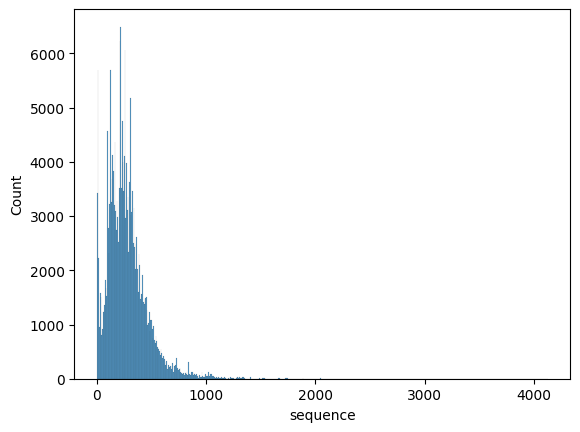

In [20]:
#Lets have a look at the lengths of sequences
y = df.sequence.str.len()
sns.histplot(y)

In [25]:
#we will filter out short poly peptides that are most likely substrates and not actual protein
m = df.sequence.str.len() > 20
df, vectors  = filter(df, vectors, m)

In [26]:
vectors.shape

(211620, 1280)

In [27]:
#lets see how the embbeded vectors look like
means = vectors.mean(axis=0)
stds =  vectors.std(axis=0)
mins = vectors.min(axis=0)
maxs = vectors.max(axis=0)

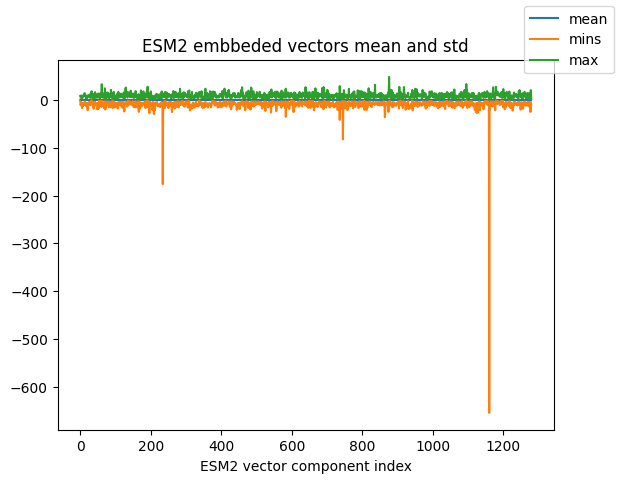

In [28]:
fig, ax = plt.subplots()

x = np.arange(len(means))
y = means
yerr = stds
# ax.errorbar(x, y,  fmt='o', ecolor='gray', elinewidth=2, capsize=3)
ax.plot(x,y, label='mean')
ax.plot(x,mins, label='mins')
ax.plot(x,maxs, label='max')

ax.set_xlabel('ESM2 vector component index')
ax.set_title('ESM2 embbeded vectors mean and std')

fig.legend()

We can see that the values are centered around 0, with few outlier components.
Lets see if these outliers are because of a specific sequence or a general trend of the component 

In [29]:
#esm features with lowes minimum values
pd.Series(mins).sort_values().head(5)

1160   -654.819031
234    -176.302521
745     -82.446449
736     -41.765034
864     -36.040394
dtype: float32

In [33]:
#if we examine the component 1160 of the ESM vectors we can see that the very low values are shared among all proteins, and are not due to a specific sequence.
#This indicate that this change in value is innate to the ESM model and we will leave it so.
j = 1160
vectors[:,j].min()
pd.Series(vectors[:, j]).sort_values().head(100)

161912   -654.819031
148934   -648.508057
192964   -591.050476
102910   -563.704590
161910   -552.254883
             ...    
162837   -356.958740
151234   -356.761078
107608   -356.135376
179205   -355.794495
149438   -354.119324
Length: 100, dtype: float32

In [ ]:
#ADD A PCA EXAMPLE